In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Base Pairs chemical groups

In [3]:
# A- Acceptor, D- Donor, M- Methyl, n- non-polar, x- empty 
# Define the groups in Major Groove:
MG_funcGroups= {
    'A': ['A','D'],
    'T': ['M','A'],
    'C': ['n','D'],
    'G': ['A','A'],
    'U': ['n','A'],
    '5mC': ['M','D'],
    '7dA': ['n','D'],
    '7dG': ['n','A'],
    'I': ['A','A'],
    '6mA': ['A','M'],
    'D' : ['x','x']
}

# and in minor Groove:
mG_funcGroups= {
    'A': ['A','n'],
    'T': ['x','A'],
    'C': ['x','A'],
    'G': ['A','D'],
    'U': ['x','A'],
    '5mC': ['x','A'],
    '7dA': ['A','n'],
    '7dG': ['A','D'],
    'I': ['A','n'],
    '6mA': ['A','n'],
    'D': ['x','x']

}

In [4]:
basePairs = []
MG_pairs=[]
mG_pairs=[]

for base in MG_funcGroups.keys():
    for Pbase in MG_funcGroups.keys():
        MG_pairs.append(MG_funcGroups[base]+MG_funcGroups[Pbase][::-1])
        mG_pairs.append(mG_funcGroups[base]+mG_funcGroups[Pbase][::-1])
        basePairs.append(base+'-'+Pbase)

df = pd.DataFrame( index=basePairs)
df['Major Groove'] = MG_pairs
df['Minor Groove'] = mG_pairs
df

,Major Groove,Minor Groove
A-A,"[A, D, D, A]","[A, n, n, A]"
A-T,"[A, D, A, M]","[A, n, A, x]"
A-C,"[A, D, D, n]","[A, n, A, x]"
A-G,"[A, D, A, A]","[A, n, D, A]"
A-U,"[A, D, A, n]","[A, n, A, x]"
...,...,...
D-7dA,"[x, x, D, n]","[x, x, n, A]"
D-7dG,"[x, x, A, n]","[x, x, D, A]"
D-I,"[x, x, A, A]","[x, x, n, A]"
D-6mA,"[x, x, M, A]","[x, x, n, A]"


## Plot the patterns

In [5]:
basePairs = []
MG_mG_pairs=[]

for base in MG_funcGroups.keys():
    for Pbase in MG_funcGroups.keys():
        MG_mG_pairs.append(MG_funcGroups[base]+MG_funcGroups[Pbase][::-1]+['s']+mG_funcGroups[base]+mG_funcGroups[Pbase][::-1])
        basePairs.append(base+'-'+Pbase)

MG_mG_pairs_array = np.array(MG_mG_pairs)

0 : 30
30 : 60
60 : 90
90 : 120


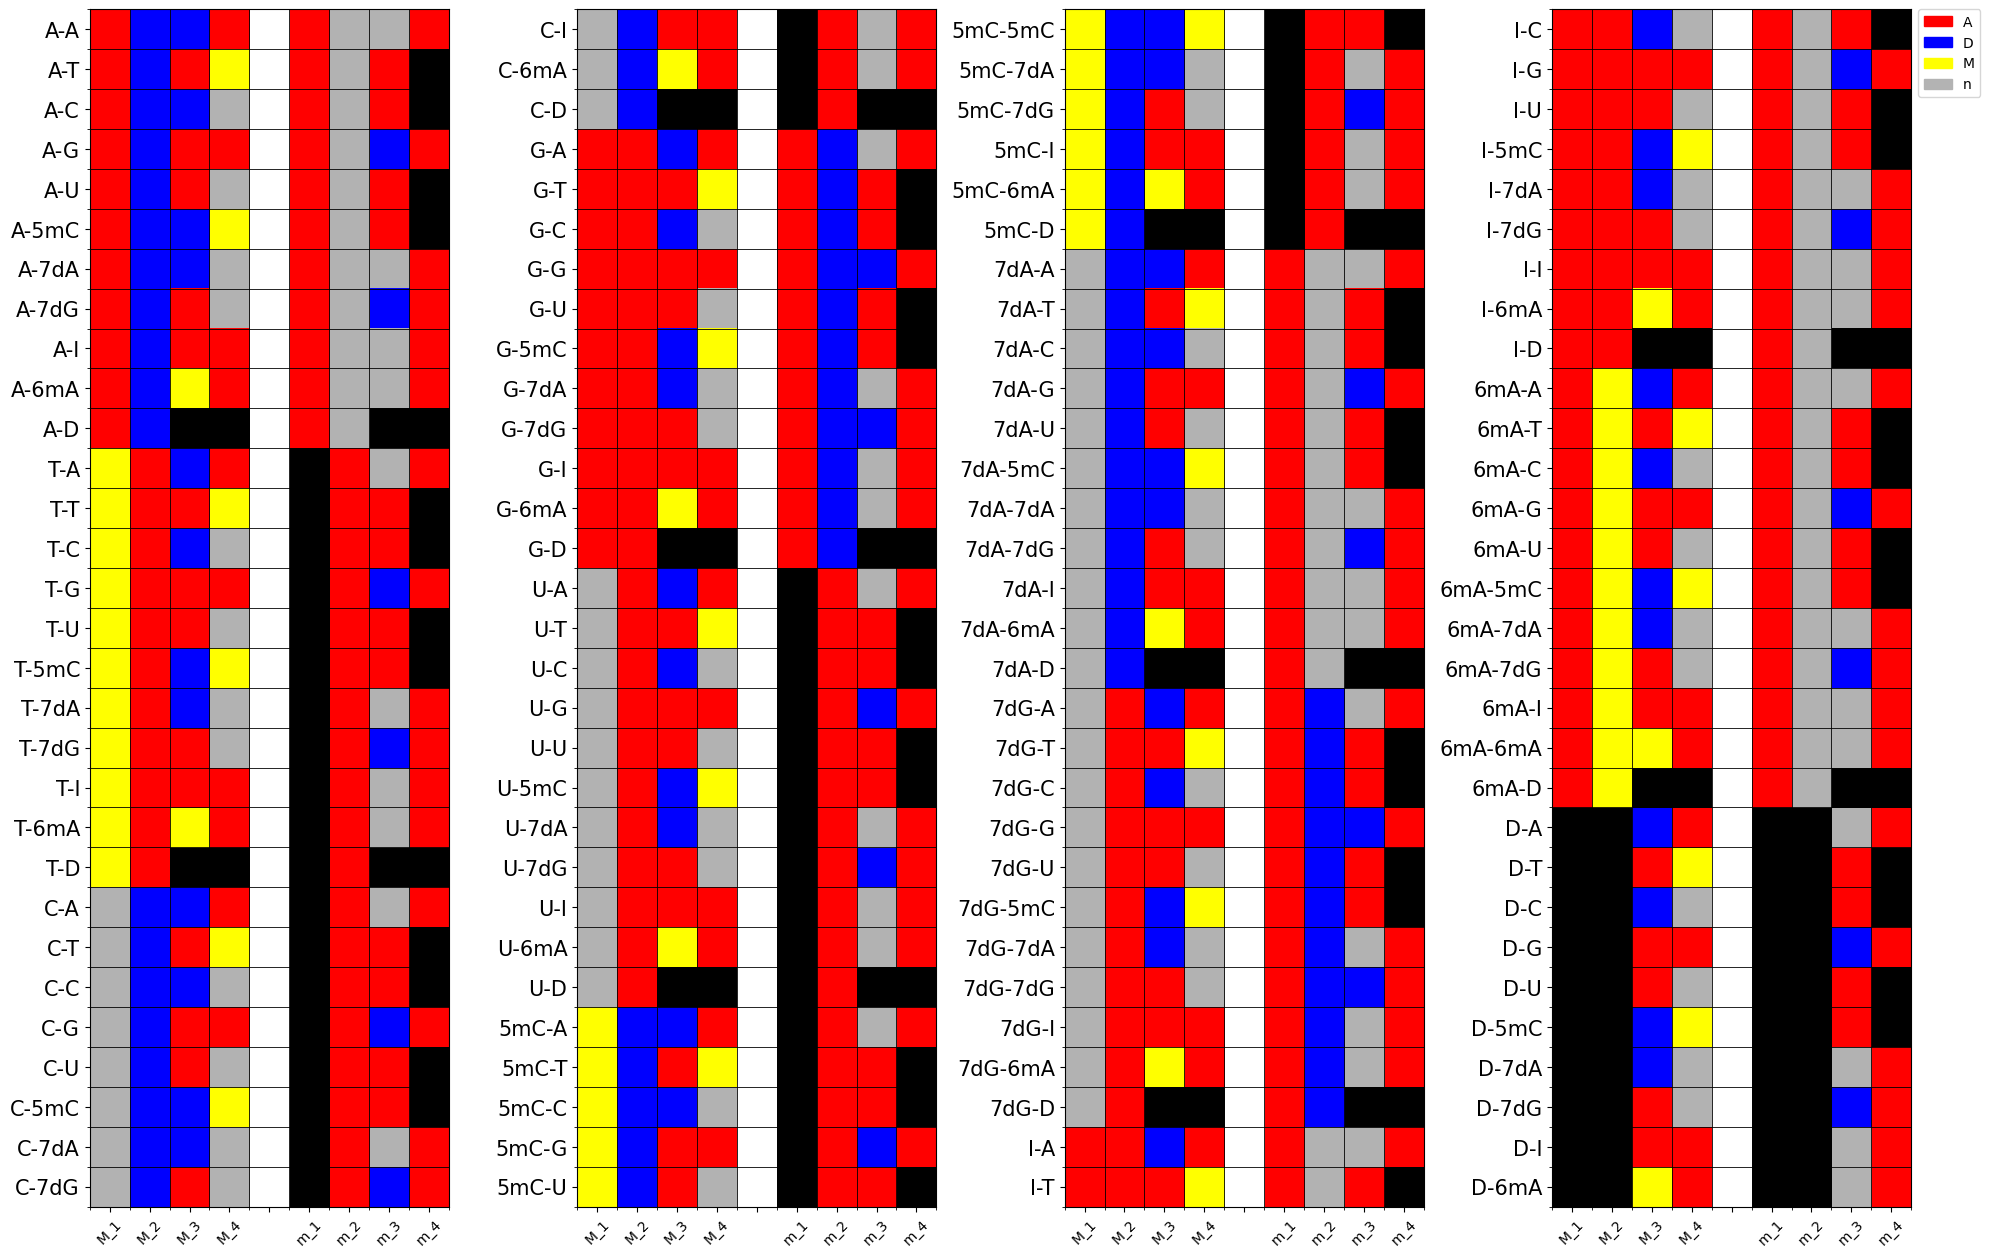

In [6]:
from matplotlib.patches import Patch


color_imgs=[]
bps_list=[]
n= 4
BPs = basePairs
Arr = MG_mG_pairs_array #MGgroups_array
N_rows, N_cols = Arr.shape

for i in range(0,n):
    print(i*N_rows//n, ':', i*N_rows//n + N_rows//n)
    arr = Arr[i*N_rows//n : i*N_rows//n + N_rows//n ,:]
    bps = BPs[i*N_rows//n : i*N_rows//n + N_rows//n ]
    n_rows, n_cols = arr.shape


    rgb_map = {'A': (1.0, 0.0, 0.0),  # red
            'D': (0.0, 0.0, 1.0),  # blue
            'M': (1.0, 1.0, 0.0),  # yellow
            'n': (0.7, 0.7, 0.7),  # grey
            's': (1.0, 1.0, 1.0),  # white
            'x': (0.0, 0.0, 0.0)}  # black

    # build RGB images
    color_img = np.zeros((n_rows, n_cols, 3), dtype=float)
    for i in range(n_rows):
        for j in range(n_cols):
            color_img[i, j] = rgb_map.get(arr[i, j], (1.0, 1.0, 1.0))

    color_imgs.append(color_img)
    bps_list.append(bps)

# create subplot for each array slice and its color_img
fig, axes = plt.subplots(1, n, figsize=(5*n, 30), squeeze=False)
axes = axes.ravel()

for k, ax in enumerate(axes):
    ax.imshow(color_imgs[k], aspect='equal', origin='upper', interpolation='nearest')

    # black grid lines between cells
    ax.set_xticks(np.arange(-0.5, n_cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n_rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.6)
    ax.set_axisbelow(False)

    # align grid
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(n_rows - 0.5, -0.5)

    # ticks
    ax.set_xticks(range(n_cols))
    ax.set_xticklabels(['M_1','M_2','M_3','M_4','','m_1','m_2','m_3','m_4'], fontsize=10, rotation=45)
    

    ax.set_yticks(range(0, n_rows))
    ax.set_yticklabels(bps_list[k], fontsize=15)


    
    # annotate letters
    # for i in range(n_rows):
    #     for j in range(n_cols):
    #         r, g, b = color_img[i, j]
    #         brightness = 0.299 * r + 0.587 * g + 0.114 * b
    #         text_color = 'white' if brightness < 0.55 else 'black'
    #         ax.text(j, i, arr[i, j], ha='center', va='center', color=text_color, fontsize=15)

# legend on the last axis
legend_handles = [Patch(color=rgb_map[k], label=k) for k in ['A', 'D', 'M', 'n']]
axes[-1].legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()